In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/KHAI PHÁ DỮ LIỆU/thực hành 7/bank-data.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [ ]:

# Tính toán các giá trị thống kê mô tả cho cột tuổi và thu nhập:
print(df['age'].describe().round(2))
print(df['income'].describe().round(2))

count    600.00
mean      42.40
std       14.42
min       18.00
25%       30.00
50%       42.00
75%       55.25
max       67.00
Name: age, dtype: float64
count      600.00
mean     27524.03
std      12899.47
min       5014.21
25%      17264.50
50%      24925.30
75%      36172.67
max      63130.10
Name: income, dtype: float64


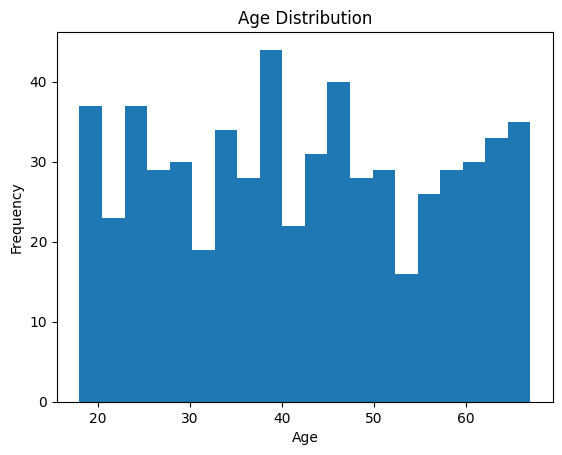

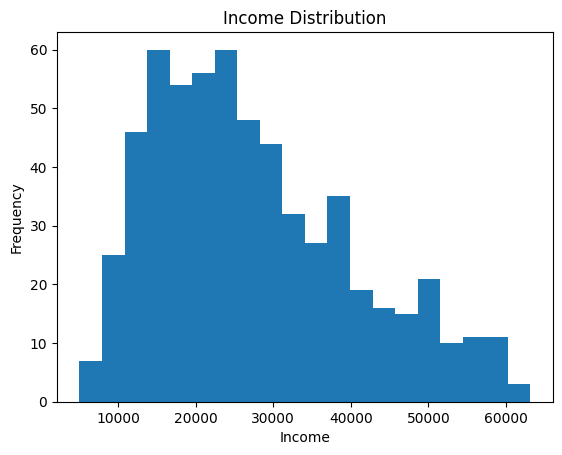

In [ ]:

# Vẽ 2 biểu đồ phân bố tần số của tuổi và thu nhập:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.figure()

plt.hist(df['income'], bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')

plt.show()


In [ ]:
# Xóa cột id để ẩn danh thông tin cá nhân
df.drop("id", axis=1, inplace=True)

In [ ]:
# Tính mode của các cột tình trạng hôn nhân và số con:
print(df['married'].mode())
print(df['children'].mode())

0    YES
Name: married, dtype: object
0    0
Name: children, dtype: int64


**=> đa số đã kết hôn, chưa có con**

In [ ]:
# Lưu dữ liệu vào tập tin mới Bank-Data-Clustering.csv:
df.to_csv('/content/drive/MyDrive/KHAI PHÁ DỮ LIỆU/thực hành 7/Bank-Data-Clustering.csv')

In [ ]:
# Đọc dữ liệu từ Bank-Data-Clustering.csv
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/KHAI PHÁ DỮ LIỆU/thực hành 7/Bank-Data-Clustering.csv')
df

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Các cột categorical cần convert thành dạng số
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df['married'] = le.fit_transform(df['married'])
df['car'] = le.fit_transform(df['car'])
df['save_act'] = le.fit_transform(df['save_act'])
df['current_act'] = le.fit_transform(df['current_act'])
df['mortgage'] = le.fit_transform(df['mortgage'])
# ** Cột 'pep' là target nên không cần chuẩn hóa.
df.to_csv('/content/drive/MyDrive/KHAI PHÁ DỮ LIỆU/thực hành 7/Bank-Data-Clustering_std.csv', index=False)
df

,Unnamed: 0,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,0,48,0,0,17546.00,0,1,0,0,0,0,YES
1,1,40,1,3,30085.10,1,3,1,0,1,1,NO
2,2,51,0,0,16575.40,1,0,1,1,1,0,NO
3,3,23,0,3,20375.40,1,3,0,0,1,0,NO
4,4,57,0,1,50576.30,1,0,0,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,61,0,0,47025.00,0,2,1,1,1,1,NO
596,596,30,0,0,9672.25,1,0,1,1,1,0,NO
597,597,31,0,3,15976.30,1,0,1,1,0,0,YES
598,598,29,1,0,14711.80,1,0,0,1,0,1,NO


In [ ]:
# Tách thành 2 tập tin Train và Test, trong đó Test chứa 50 dòng cuối
df_train = df.iloc[:-50]
df_test = df.iloc[-50:]

df_train.to_csv('/content/drive/MyDrive/KHAI PHÁ DỮ LIỆU/thực hành 7/Bank-Data-Clustering-Train.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/KHAI PHÁ DỮ LIỆU/thực hành 7/Bank-Data-Clustering-Test.csv', index=False)

from sklearn.cluster import KMeans

In [ ]:
# Loại bỏ cột 'pep' từ cả tập dữ liệu Train
X_train = df_train.drop('pep', axis=1)

In [1]:
# Thực hiện gom cụm KMean cho tập Train với k=2, k=3, k=4
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X_train)
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X_train)

NameError: name 'KMeans' is not defined

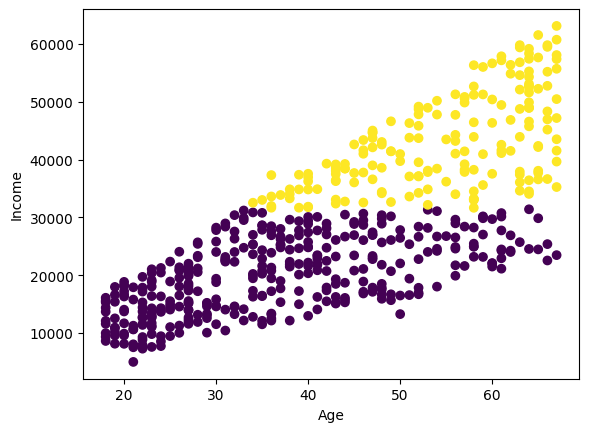

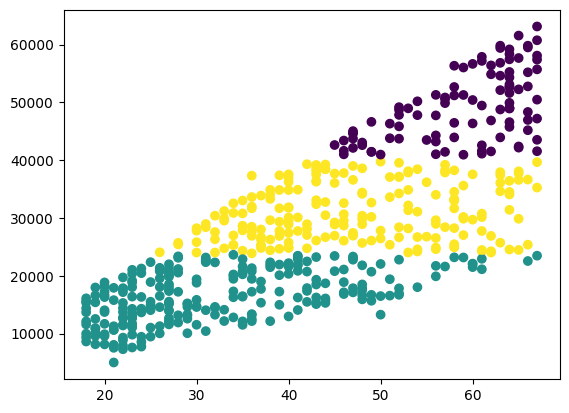

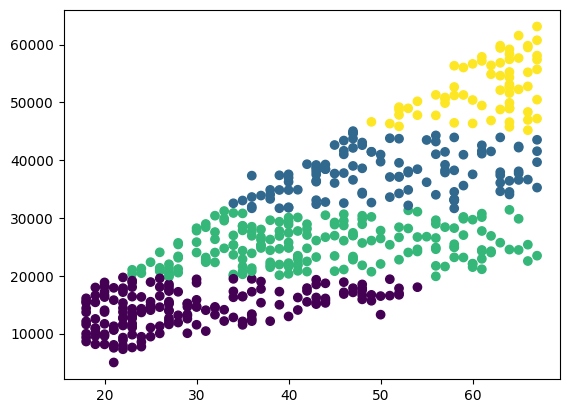

[[222  72]
 [146 110]]
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       294
           1       0.60      0.43      0.50       256

    accuracy                           0.60       550
   macro avg       0.60      0.59      0.59       550
weighted avg       0.60      0.60      0.59       550



<ipython-input-14-2047932ca0e9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['pep'] = le.fit_transform(df_train['pep'])


In [ ]:

# Fit model KMeans với dữ liệu đã được chuẩn hóa:
X_train = df_train.drop('pep', axis=1)

y_pred_2 = kmeans2.predict(X_train) #k=2
y_pred_3 = kmeans3.predict(X_train) #k=3
y_pred_4 = kmeans4.predict(X_train) #k=4

import matplotlib.pyplot as plt

plt.xlabel('Age')
plt.ylabel('Income')


In [ ]:
# Loại bỏ cột 'pep' từ cả 2 tập dữ liệu Test
X_test = df_test.drop('pep', axis=1)



**Biểu đồ 1 (Khi chia làm 2 cụm)**
- Ta thấy tuổi càng cao => thu nhập càng cao

**Biểu đồ 2 (Khi chia làm 3 cụm)**
- Đa số phân bố chủ yếu vào thu nhập trung bình và thu nhập thấp

**Biểu đồ 3 (Khi chia làm 4 cụm)**
+ Thu nhập thấp: chủ yếu độ tuổi từ 20 đến 30
+ Thu nhập trung bình thấp: phân bố giảm dần từ 30 đến 60
+ Thu nhập trung bình: phân bố nhiều ở độ tuổi 40 - 50, thưa dần từ sau 50
+ Thu nhập cao: Chủ yếu từ độ tuối 50 trở đi

**=> Chia số cụm càng cao, ta càng thấy rõ sự chênh lệch về tuối tác và thu nhập**
- Ở biểu đồ 3 ta thấy rõ, độ tuổi 20 - 30 hầu như không có được mức thu nhập cao, và ngược lại khoảng tuổi cao như 50 - 60 hầu như không có mức thu nhập thấp.


In [ ]:
# Thực hiện gom cụm KMean cho tập Test với k=2, k=3, k=4
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X_test)
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X_test)
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


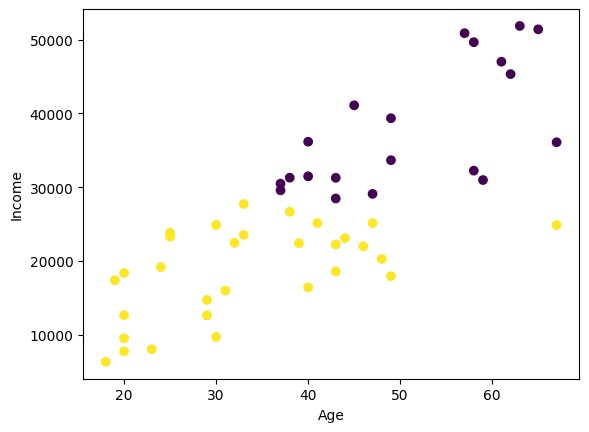

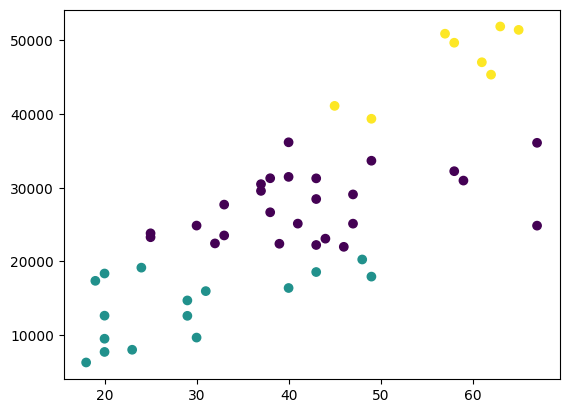

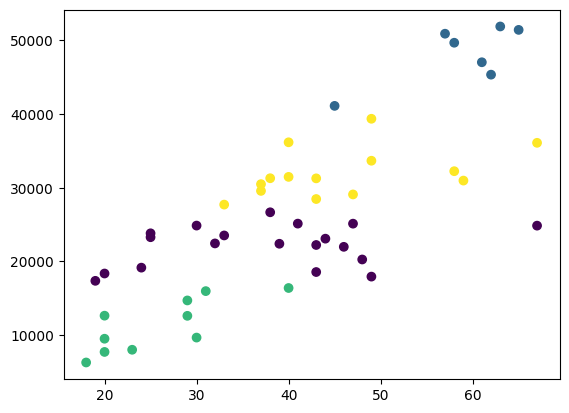

[[15 17]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.75      0.47      0.58        32
           1       0.43      0.72      0.54        18

    accuracy                           0.56        50
   macro avg       0.59      0.60      0.56        50
weighted avg       0.64      0.56      0.56        50



<ipython-input-17-906e8c6505e6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pep'] = le.fit_transform(df_test['pep'])


In [ ]:

# Fit model KMeans với dữ liệu đã được chuẩn hóa:
X_test = df_test.drop('pep', axis=1)

y_pred_2 = kmeans2.predict(X_test) #k=2
y_pred_3 = kmeans3.predict(X_test) #k=3
y_pred_4 = kmeans4.predict(X_test) #k=4

import matplotlib.pyplot as plt

plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(X_test['age'], X_test['income'], c=y_pred_2)
plt.show()

plt.scatter(X_test['age'], X_test['income'], c=y_pred_3)
plt.show()

plt.scatter(X_test['age'], X_test['income'], c=y_pred_4)
plt.show()

from sklearn.metrics import confusion_matrix, classification_report

le = LabelEncoder()
df_test['pep'] = le.fit_transform(df_test['pep'])
y_true = df_test['pep']

print(confusion_matrix(y_true, y_pred_2))
print(classification_report(y_true, y_pred_2))